In [2]:
import re
import pandas as pd

In [3]:
df = pd.read_csv("../data/balance.csv",index_col=[0],low_memory=False)
df

,userID,tag,content,date,year,label
0,kl2991,推,蔡母狗陳肥婆派來滅證的嗎,12/03,2021.0,1
1,jab,推,高薪找不到人 笑死人 台積電紅包發多少,08/15,2022.0,0
2,LoveMakeLove,推,鵝,09/21,2022.0,0
3,cgluck,推,很肥又很醜的另當別論,08/29,2022.0,1
4,zaqwsxjason,→,龍妹嘔嘔嘔,10/01,2021.0,1
...,...,...,...,...,...,...
12220,sam4105112,推,花錢看肥宅肥婆畫的皮 然後酸騎士團,12/27,2021.0,1
12221,Biatch5566,推,好可怕 點進來前很怕是肥婆,10/28,2021.0,1
12222,BaRanKa,→,結果骨子裡面..依舊兇殘還對這麼瘦的女孩,10/17,2021.0,0
12223,hoha1111,推,好的 樓上塔綠班 四個同意,12/16,2021.0,0


In [18]:
df['label'] = df['label'].astype(str)

df_0 = df[df["label"].str.contains(pat = "0", regex=True,na=False)]
df_0 = df_0.sample(n=500,axis=0)
df_1 = df[df["label"].str.contains(pat = "1", regex=True,na=False)]
df_1 = df_1.sample(n=500,axis=0)
df_2 = df[df["label"].str.contains(pat = "2", regex=True,na=False)]
df_2 = df_2.sample(n=500,axis=0)

In [19]:
# for i in df.content:
#     print(i)
random_df = pd.concat([df_0, df_1, df_2])
random_df = random_df.sample(n=len(random_df),axis=0)
random_df.reset_index(drop=True, inplace=True)
random_df

,userID,tag,content,date,year,label
0,daydreamer13,→,建築物蓋到一半會要追加兩倍以上預,07/23,2022.0,0
1,ezafine,噓,噁心,05/11,2022.0,0
2,CycleEnergy,推,太重的瘦皮猴會舉不起來,11/29,2021.0,2
3,Sam717,推,嬯婊一堆肥婆,06/06,2022.0,1
4,vajra0001,推,沒奶的妹子 就沒商量,03/17,2022.0,2
...,...,...,...,...,...,...
1495,rex9999,噓,「女生沒奶就像男生沒錢」這句話記好了,09/26,2021.0,2
1496,Sabo5566,推,醜臭禿肥啊,09/27,2021.0,1
1497,j32072,推,怎那麼慘 沒奶也沒屁股,01/10,2022.0,2
1498,JustIam,→,八國裡面肯定不會有中國,02/26,2022.0,0


In [22]:
random_df.to_csv("./data/llms_df.csv",mode='w', encoding='utf-8')

In [70]:
df_1 = pd.read_csv("./data/llms_df.csv", index_col=[0])
df_1

,userID,tag,content,date,year,label
0,daydreamer13,→,建築物蓋到一半會要追加兩倍以上預,07/23,2022.0,0
1,ezafine,噓,噁心,05/11,2022.0,0
2,CycleEnergy,推,太重的瘦皮猴會舉不起來,11/29,2021.0,2
3,Sam717,推,嬯婊一堆肥婆,06/06,2022.0,1
4,vajra0001,推,沒奶的妹子 就沒商量,03/17,2022.0,2
...,...,...,...,...,...,...
1495,rex9999,噓,「女生沒奶就像男生沒錢」這句話記好了,09/26,2021.0,2
1496,Sabo5566,推,醜臭禿肥啊,09/27,2021.0,1
1497,j32072,推,怎那麼慘 沒奶也沒屁股,01/10,2022.0,2
1498,JustIam,→,八國裡面肯定不會有中國,02/26,2022.0,0


## chatglm

In [659]:
import pandas as pd
df = pd.read_csv("./data/chatglm_Q2.csv", index_col=[0])
# df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
# (pd.DataFrame.from_dict(data=df)
#      .to_csv("chatglm_clean.csv", mode='w'))
df

,sentene,label,comprehensive,predicted,fat_skinny,response_Q1,response_Q2
0,建築物蓋到一半會要追加兩倍以上預,0,0,3,3,根據身體羞辱定義，建築物蓋到一半會要追加兩倍以上預，這種行為可能涉及有關於身體羞辱的歧視，因...,Q1 無法判斷
1,噁心,0,0,0,0,身體羞辱定義與文章內容無關，因此不涉及有關於身體羞辱的歧視。,Q1 判斷無歧視
2,太重的瘦皮猴會舉不起來,2,1,1,2,這篇文章涉及身體羞辱的歧視。在這篇文章中，作者對於一個重點的評論是“太重的瘦皮猴會舉不起來”...,這篇文章是歧視瘦子的文章。
3,嬯婊一堆肥婆,1,1,1,1,這篇文章涉及有關於身體羞辱的歧視。嬯婊和肥婆這兩個詞在中文語境中通常被用來指代同一個實際人物...,這篇文章是歧視胖子的類型。
4,沒奶的妹子 就沒商量,2,1,1,1,這篇文章涉及身體羞辱的歧視。在這篇文章中，作者對於一個沒奶的女生進行了負面評論，並且說這個女...,這篇文章是歧視胖子的文章。
...,...,...,...,...,...,...,...
1495,「女生沒奶就像男生沒錢」這句話記好了,2,1,1,1,這句話涉及有關於身體羞辱的歧視。在這種情況下，該句子表示了對女性的負面評論，因為她被該詞語用...,這句話是歧視胖子的。
1496,醜臭禿肥啊,1,1,1,1,這篇文章涉及有關於身體羞辱的歧視。該文章用“醜臭禿肥”這個詞語對“肥”這個目標身體進行了負面...,這篇文章是歧視胖子的類型。
1497,怎那麼慘 沒奶也沒屁股,2,1,0,0,這篇文章並沒有涉及有關於身體羞辱的歧視。身體羞辱是一種非重複性行為，在這種行為中加害者不請自...,Q1 判斷無歧視
1498,八國裡面肯定不會有中國,0,0,3,3,八國裡面肯定不會有中國，這是一個涉及身體羞辱的歧視。身體羞辱是一種行為，在這種行為中，加害者...,Q1 無法判斷


## Q1

In [418]:
all_sentene = []
all_label = []
all_comprehensive = []
all_predicted =[]
all_response = []

count = []
for sentene, label, predicted, response, index in zip(df.sentene, df.label, df.predicted, df.response, range(0,len(df.label))):
    if sentene == 'sentene' and label =="label":
        continue
    else:
    
        if "該文章涉及有關於身體羞辱的歧視" in response or "這篇文章涉及有關於身體羞辱的歧視" in response or "這篇文章涉及到有關於身體羞辱的歧視" in response or "行為涉及有關於身體羞辱的歧視" in response or "這篇文章涉及身體羞辱的歧視" in response or "該問題涉及到身體羞辱" in response or "因此涉及有關於身體羞辱的歧視" in response or "因此涉及身體羞辱歧視" in response or "都涉及身體羞辱" in response or "這些詞語涉及到身體羞辱的歧視" in response or "這篇文章涉及身體羞辱" in response:
            predicted = 1
            all_predicted.append(1)
    #         count.append(0)
        elif "這篇文章未涉及有關於身體羞辱的歧視" in response or "這篇文章沒有涉及身體羞辱的歧視" in response or "這篇文章並未涉及有關於身體羞辱的歧視" in response or "沒有涉及有關於身體羞辱的歧視" in response or "這篇文章並沒有涉及有關於身體羞辱的歧視" in response or "沒有涉及身體羞辱的歧視" in response or "該文章未涉及有關於身體羞辱的歧視" in response or "這篇文章沒有涉及有關於身體羞辱的歧視" in response or "不涉及有關於身體羞辱的歧視" in response or "未涉及有關於身體羞辱的歧視" in response or "不涉及歧視" in response or "並沒有涉及到有關於身體羞辱的歧視" in response:
            predicted = 0
            all_predicted.append(0)
    #         count.append(0)
        elif "可能" in response or "無法判斷該文章是否涉及有關於身體羞辱的歧視" in response or response == "缺":
            predicted = 3
            all_predicted.append(3)
    #         count.append(0)
        else:
    #         print(index,sentene,'\n',response,"\n\n\n")
            predicted = 3
            all_predicted.append(3)
    #         count.append(0)
        if label == "2" or label == "1":
            comprehensive = 1
            all_comprehensive.append(1)
    #         comprehensive.append(1)
        elif label == "0" or label == "4":
            comprehensive = 0
            all_comprehensive.append(0)
    #         comprehensive.append(0)
        all_sentene.append(sentene.replace(',',' '))
        all_label.append(label)
        all_response.append(response)
#     if predicted != label:
#         if predicted == 1 or predicted == 2 and label == 1:
#             pass
#         else:
#             print(f"sentene:{sentene}\nlabel:{label}\npredicted:{predicted}\nresponse:{response}\n\n")


dir_keys = ["sentene", "label", "comprehensive", "predicted", "response"]
dir_values =[all_sentene, all_label, all_comprehensive, all_predicted, all_response]
dic = dict(zip(dir_keys, dir_values))
df_re = pd.DataFrame(dic)
# df_re.to_csv("chatglm_ver2.csv", mode='w', encoding='utf-8')
# df_re

## Q2

In [492]:
all_sentene = []
all_label = []
all_comprehensive = []
all_predicted =[]
all_fat_skinny = []
all_response_Q1 = []
all_response_Q2 = []

df = pd.read_csv("./data/chatglm_Q2_original.csv", index_col=[0])
for sentene, label, comprehensive, predicted, fat_skinny, response_Q1, response_Q2, index in zip(df.sentene, df.label, df.comprehensive, df.predicted, df.fat_skinny, df.response_Q1, df.response, range(0,len(df.label))):
    if sentene == 'sentene' and label =="label":
        continue
    else:
        if predicted == "0":
            fat_skinny = 0
            all_fat_skinny.append(0)
        elif predicted == "3":
            fat_skinny = 3
            all_fat_skinny.append(3)
        elif predicted == "1":
            if "歧視胖" in response_Q2:
                fat_skinny = 1
                all_fat_skinny.append(1)
            elif "歧視瘦" in response_Q2:
                fat_skinny = 2
                all_fat_skinny.append(2)
            else:
#                 print(response_Q2,"\n\n\n\n")
                fat_skinny = 3
                all_fat_skinny.append(3)
        all_sentene.append(sentene.replace(',',' '))
        all_label.append(int(label))
        all_comprehensive.append(int(comprehensive))
        all_predicted.append(int(predicted))
        all_response_Q1.append(response_Q1)
        all_response_Q2.append(response_Q2)

# dir_keys = ["sentene", "label", "comprehensive", "predicted", "fat_skinny", "response_Q1", "response_Q2"]
# dir_values =[all_sentene, all_label, all_comprehensive, all_predicted, all_fat_skinny, all_response_Q1, all_response_Q2]
# dic = dict(zip(dir_keys, dir_values))
# df_re = pd.DataFrame(dic)
# df_re.to_csv("./data/chatglm_Q2.csv", mode='w', encoding='utf-8')


In [4]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
df = pd.read_csv("./data/chatglm_Q2.csv", index_col=[0])
# print(f1_score(df.comprehensive, df.predicted, average='macro'))
# print(f1_score(df.comprehensive, df.predicted, average='micro'))
# print(f1_score(df.comprehensive, df.predicted, average='weighted'))
report_nb = classification_report(df.comprehensive, df.predicted)
print(report_nb)

              precision    recall  f1-score   support

           0       0.52      0.33      0.40       500
           1       0.72      0.84      0.78      1000
           3       0.00      0.00      0.00         0

    accuracy                           0.67      1500
   macro avg       0.42      0.39      0.39      1500
weighted avg       0.66      0.67      0.65      1500



/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
df = pd.read_csv("./data/chatglm_Q2.csv", index_col=[0])
# print(f1_score(df.label, df.fat_skinny, average='macro'))
# print(f1_score(df.label, df.fat_skinny, average='micro'))
# print(f1_score(df.label, df.fat_skinny, average='weighted'))
report_nb = classification_report(df.label, df.fat_skinny)
print(report_nb)

              precision    recall  f1-score   support

           0       0.52      0.33      0.40       500
           1       0.46      0.81      0.59       500
           2       0.79      0.39      0.52       500
           3       0.00      0.00      0.00         0

    accuracy                           0.51      1500
   macro avg       0.44      0.38      0.38      1500
weighted avg       0.59      0.51      0.50      1500



/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


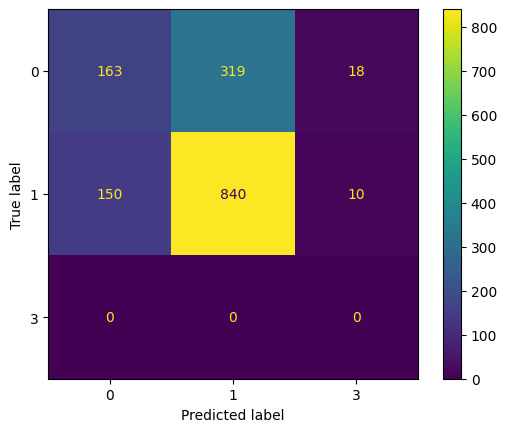

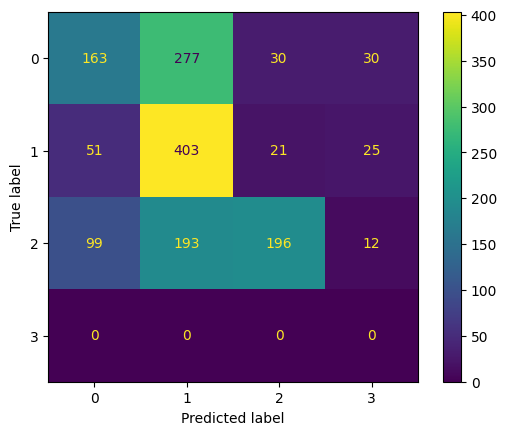

In [473]:
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv("./data/chatglm_Q2.csv", index_col=[0])

confusion_matrix = metrics.confusion_matrix(df.comprehensive, df.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 3])
cm_display.plot()
plt.show()

confusion_matrix = metrics.confusion_matrix(df.label, df.fat_skinny)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3])
cm_display.plot()
plt.show()

## 錯誤分析

In [5]:
df = pd.read_csv("./data/chatglm_Q2.csv", index_col=[0])
for sentene, label, comprehensive, predicted, fat_skinny, response_Q1, response_Q2, index in zip(df.sentene, df.label, df.comprehensive, df.predicted, df.fat_skinny, df.response_Q1, df.response_Q2, range(0,len(df.label))):
    if label == 1:
        if fat_skinny != 1:
            print(f"label:{label}  fat-skinny:{fat_skinny}\n句子: {sentene}\nresponse-Q1:\n{response_Q1}\nresponse-Q2:\n{response_Q2}\n\n\n\n")

label:1  fat-skinny:0
句子: 胖子可以變瘦 矮要變高就難了
response-Q1:
這篇文章未涉及有關於身體羞辱的歧視。身體羞辱是一種非重複性行為，在這種行為中，加害者不請自來對目標身體表達負面意見或評論。然而，這篇文章僅僅提到胖子可以變瘦，矮要變高就難了，並未涉及身體羞辱的範圍。因此，這篇文章不涉及有關於身體羞辱的歧視。
response-Q2:
Q1 判斷無歧視




label:1  fat-skinny:3
句子: 肥短腿
response-Q1:
根據身體羞辱定義，肥短腿是一種負面評論，因此該文章涉及有關於身體羞辱的歧視。
response-Q2:
肥短腿




label:1  fat-skinny:0
句子: 你去話火節會想找龍妹嗎？同理可証！
response-Q1:
這篇文章未涉及有關於身體羞辱的歧視。身體羞辱是一種非重複性行為，在這種行為中加害者不請自來對目標身體表達負面意見或評論。這篇文章並未提到身體羞辱的範圍，也沒有說明該行為具有負面、具有冒犯性或使其產生身體羞恥感。因此，這篇文章沒有涉及有關於身體羞辱的歧視。
response-Q2:
Q1 判斷無歧視




label:1  fat-skinny:0
句子: 要注意你說的是平均 不是娶刁女或龍妹
response-Q1:
這篇文章未涉及有關於身體羞辱的歧視。身體羞辱是一種非重複性行為，在這種行為中，加害者不請自來對目標身體表達負面意見或評論。因此，該行為的範圍從善意的建議到惡意的羞辱，並且該行為並不是有意傷害被害者。因此，這篇文章未涉及有關於身體羞辱的歧視。
response-Q2:
Q1 判斷無歧視




label:1  fat-skinny:2
句子: 你同學是不是矮矮胖胖的
response-Q1:
這篇文章涉及身體羞辱的歧視。在這篇文章中，作者對同學的身體進行了負面評論，並且使用了“矮矮胖胖的”這個詞語來形容他們的身體。這種行為可能會使被評論的同學感到冒犯或羞恥，並且從而導致歧視。因此，這篇文章可能會受到歧視的影響。
response-Q2:
這篇文章是歧視瘦子的。




label:1  fat-skinny:0
句子: 肥胖 超噁心
response-Q1:
這篇文章未涉及有關於身體羞辱的歧視。身體羞辱是一種非重複性行為，在這種行為中加害者不

## llama

In [669]:
import pandas as pd
df = pd.read_csv("./data/Alpaca_Q1_original.csv", index_col=[0])
# df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df

,sentene,label,predicted,response
0,建築物蓋到一半會要追加兩倍以上預,0,0,未涉及歧視。
1,sentene,label,predicted,response
2,噁心,0,3,文章涉及身體羞辱的歧視。
3,sentene,label,predicted,response
4,太重的瘦皮猴會舉不起來,2,3,文章涉及身體羞辱的歧視。
...,...,...,...,...
2994,怎那麼慘 沒奶也沒屁股,2,1,這篇文章涉及身體羞辱的歧視。
2995,sentene,label,predicted,response
2996,八國裡面肯定不會有中國,0,1,這篇文章涉及身體羞辱的歧視。
2997,sentene,label,predicted,response


## Q1

In [671]:
all_sentene = []
all_label = []
all_comprehensive = []
all_predicted =[]
all_response = []

count = []

for sentene, label, predicted, response, index in zip(df.sentene, df.label, df.predicted, df.response, range(0,len(df.label))):
    if sentene == 'sentene' and label =="label":
        continue
    else:
        if "未涉及歧視" in response  or "不涉及歧視" in response or "並未涉及有關於身體羞辱" in response or "不涉及有關於身體羞辱的歧視" in response or "文章未涉及身體羞辱的歧視" in response or "文中并未涉及有關於身體羞辱的歧視" in response or "這篇文章並未涉及身體羞辱的歧視" in response:
            predicted = 0
            all_predicted.append(0)
#             count.append(0)
        elif "文章涉及身體羞辱的歧視" in response or "涉及身體羞辱的歧視" in response or "這篇文章涉及了有關於身體羞辱的歧視" in response or "文章涉及有關於身體羞辱的歧視" in response or "该文章涉及了有關于身體羞辱的歧視" in response or "该文章涉及了有關身體羞辱的歧視" in response or "文章涉及了身體羞辱的歧視" in response or "這段文字涉及身體羞辱的歧視" in response or "這篇文章涉及有關於身體羞辱的歧視" in response or "文中涉及身體羞辱的歧視" in response or "已涉及身體羞辱的歧視" in response or "這句話涉及身體羞辱的歧視" in response or "该文章涉及了关于身體羞辱的歧視" in response or "文中涉及了身體羞辱的歧視" in response:
            predicted = 1
            all_predicted.append(1)
#             count.append(0)
        elif "可能" in response or "无法确定" in response or "无法回答" in response:
            predicted = 3
            all_predicted.append(3)
#             count.append(0)
        else:
#             print(index,sentene,'\n',response,"\n\n\n")
            predicted = 3
            all_predicted.append(3)
#             count.append(0)
        if label == "2" or label == "1":
            comprehensive = 1
            all_comprehensive.append(1)
        elif label == "0" or label == "4":
            comprehensive = 0
            all_comprehensive.append(0)
        all_sentene.append(sentene.replace(',',' '))
        all_label.append(label)
        all_response.append(response)
#     if predicted != label:
#         if predicted == 1 or predicted == 2 and label == 1:
#             pass
#         else:
#             print(f"sentene:{sentene}\nlabel:{label}\npredicted:{predicted}\nresponse:{response}\n\n")


dir_keys = ["sentene", "label", "comprehensive", "predicted", "response"]
dir_values =[all_sentene, all_label, all_comprehensive, all_predicted, all_response]
dic = dict(zip(dir_keys, dir_values))
df_re = pd.DataFrame(dic)
df_re.to_csv("./data/Alpaca_Q1.csv", mode='w', encoding='utf-8')
df_re

,sentene,label,comprehensive,predicted,response
0,建築物蓋到一半會要追加兩倍以上預,0,0,0,未涉及歧視。
1,噁心,0,0,1,文章涉及身體羞辱的歧視。
2,太重的瘦皮猴會舉不起來,2,1,1,文章涉及身體羞辱的歧視。
3,嬯婊一堆肥婆,1,1,1,這篇文章涉及身體羞辱的歧視。
4,沒奶的妹子 就沒商量,2,1,0,未涉及歧視。
...,...,...,...,...,...
1495,「女生沒奶就像男生沒錢」這句話記好了,2,1,1,這句話涉及身體羞辱的歧視。
1496,醜臭禿肥啊,1,1,1,文章涉及身體羞辱的歧視。
1497,怎那麼慘 沒奶也沒屁股,2,1,1,這篇文章涉及身體羞辱的歧視。
1498,八國裡面肯定不會有中國,0,0,1,這篇文章涉及身體羞辱的歧視。


In [673]:
df = pd.read_csv("./data/Alpaca_Q1.csv", index_col=[0])
df

,sentene,label,comprehensive,predicted,response
0,建築物蓋到一半會要追加兩倍以上預,0,0,0,未涉及歧視。
1,噁心,0,0,1,文章涉及身體羞辱的歧視。
2,太重的瘦皮猴會舉不起來,2,1,1,文章涉及身體羞辱的歧視。
3,嬯婊一堆肥婆,1,1,1,這篇文章涉及身體羞辱的歧視。
4,沒奶的妹子 就沒商量,2,1,0,未涉及歧視。
...,...,...,...,...,...
1495,「女生沒奶就像男生沒錢」這句話記好了,2,1,1,這句話涉及身體羞辱的歧視。
1496,醜臭禿肥啊,1,1,1,文章涉及身體羞辱的歧視。
1497,怎那麼慘 沒奶也沒屁股,2,1,1,這篇文章涉及身體羞辱的歧視。
1498,八國裡面肯定不會有中國,0,0,1,這篇文章涉及身體羞辱的歧視。


## Q2

In [677]:
all_sentene = []
all_label = []
all_comprehensive = []
all_predicted =[]
all_fat_skinny = []
all_response_Q1 = []
all_response_Q2 = []

df = pd.read_csv("./data/Alpaca_Q2_original.csv", index_col=[0])
for sentene, label, comprehensive, predicted, fat_skinny, response_Q1, response_Q2, index in zip(df.sentene, df.label, df.comprehensive, df.predicted, df.fat_skinny, df.response_Q1, df.response, range(0,len(df.label))):
    if sentene == 'sentene' and label =="label":
        continue
    else:
        if predicted == "0":
            fat_skinny = 0
            all_fat_skinny.append(0)
        elif predicted == "3":
            fat_skinny = 3
            all_fat_skinny.append(3)
        elif predicted == "1":
            if "歧視胖" in response_Q2:
                fat_skinny = 1
                all_fat_skinny.append(1)
            elif "歧視瘦" in response_Q2:
                fat_skinny = 2
                all_fat_skinny.append(2)
            else:
#                 print(predicted)
#                 print(sentene,response_Q1,"\n",response_Q2,"\n\n\n\n")
                fat_skinny = 3
                all_fat_skinny.append(3)
        all_sentene.append(sentene.replace(',',' '))
        all_label.append(int(label))
        all_comprehensive.append(int(comprehensive))
        all_predicted.append(int(predicted))
        all_response_Q1.append(response_Q1)
        all_response_Q2.append(response_Q2)

dir_keys = ["sentene", "label", "comprehensive", "predicted", "fat_skinny", "response_Q1", "response_Q2"]
dir_values =[all_sentene, all_label, all_comprehensive, all_predicted, all_fat_skinny, all_response_Q1, all_response_Q2]
dic = dict(zip(dir_keys, dir_values))
df_re = pd.DataFrame(dic)
df_re.to_csv("./data/Alpaca_Q2.csv", mode='w', encoding='utf-8')
df_re

,sentene,label,comprehensive,predicted,fat_skinny,response_Q1,response_Q2
0,建築物蓋到一半會要追加兩倍以上預,0,0,0,0,未涉及歧視。,Q1 判斷無歧視
1,噁心,0,0,1,2,文章涉及身體羞辱的歧視。,歧視瘦子
2,太重的瘦皮猴會舉不起來,2,1,1,2,文章涉及身體羞辱的歧視。,歧視瘦子
3,嬯婊一堆肥婆,1,1,1,1,這篇文章涉及身體羞辱的歧視。,歧視胖子
4,沒奶的妹子 就沒商量,2,1,0,0,未涉及歧視。,Q1 判斷無歧視
...,...,...,...,...,...,...,...
1495,「女生沒奶就像男生沒錢」這句話記好了,2,1,1,2,這句話涉及身體羞辱的歧視。,歧視瘦子。
1496,醜臭禿肥啊,1,1,1,1,文章涉及身體羞辱的歧視。,歧視胖子
1497,怎那麼慘 沒奶也沒屁股,2,1,1,2,這篇文章涉及身體羞辱的歧視。,歧視瘦子
1498,八國裡面肯定不會有中國,0,0,1,2,這篇文章涉及身體羞辱的歧視。,歧視瘦子


In [7]:
df = pd.read_csv("./data/Alpaca_Q1.csv", index_col=[0])
# print(f1_score(df.comprehensive, df.predicted, average='macro'))
# print(f1_score(df.comprehensive, df.predicted, average='micro'))
# print(f1_score(df.comprehensive, df.predicted, average='weighted'))
report_nb = classification_report(df.comprehensive, df.predicted)
print(report_nb)

              precision    recall  f1-score   support

           0       0.27      0.33      0.29       500
           1       0.66      0.54      0.60      1000
           3       0.00      0.00      0.00         0

    accuracy                           0.47      1500
   macro avg       0.31      0.29      0.30      1500
weighted avg       0.53      0.47      0.50      1500



/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
df = pd.read_csv("./data/Alpaca_Q2.csv", index_col=[0])
# print(f1_score(df.label, df.fat_skinny, average='macro'))
# print(f1_score(df.label, df.fat_skinny, average='micro'))
# print(f1_score(df.label, df.fat_skinny, average='weighted'))
report_nb = classification_report(df.label, df.fat_skinny)
print(report_nb)

              precision    recall  f1-score   support

           0       0.27      0.33      0.29       500
           1       0.63      0.40      0.49       500
           2       0.47      0.38      0.42       500
           3       0.00      0.00      0.00         0

    accuracy                           0.37      1500
   macro avg       0.34      0.28      0.30      1500
weighted avg       0.46      0.37      0.40      1500



/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wesleytys/Desktop/llms/llm_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


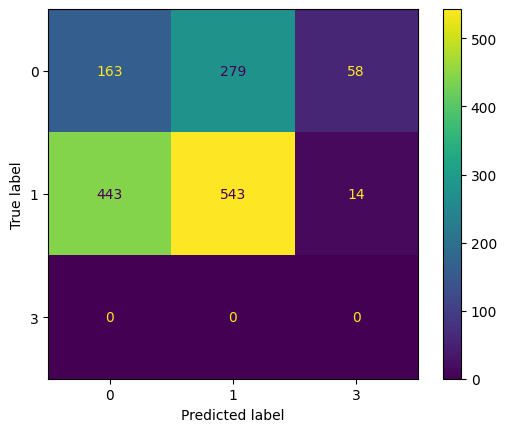

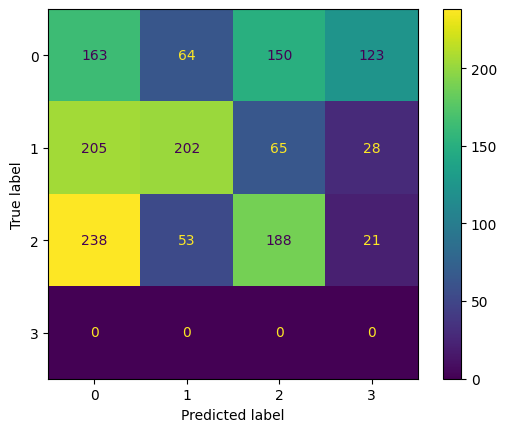

In [683]:
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv("./data/Alpaca_Q2.csv", index_col=[0])

confusion_matrix = metrics.confusion_matrix(df.comprehensive, df.predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 3])
cm_display.plot()
plt.show()

confusion_matrix = metrics.confusion_matrix(df.label, df.fat_skinny)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3])
cm_display.plot()
plt.show()

In [656]:
# df = pd.read_csv("./llama_clean.csv", index_col=[0])
# for label, fat_skinny, response, sentene, response_Q1 in zip(df.label, df.fat_skinny, df.response, df.sentene, df.response_Q1):
#     if label == 0:
#         if fat_skinny == 1:
#             print(f"label:{label}  fat-skinny:{fat_skinny}\n句子: {sentene}\nresponse-Q1:\n{response_Q1}\nresponse-Q2:\n{response}\n\n\n\n")